# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Staten Island  (Clustering)

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_island_zip_law.csv")

In [3]:
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,3150,7580,3077,13807,10301,40.637792,-74.085227
1,1501,3031,1158,5690,10302,40.632790,-74.136948
2,2047,4509,1839,8395,10303,40.631216,-74.161290
3,2946,6294,2729,11969,10304,40.616653,-74.083375
4,1813,3762,1799,7374,10305,40.598404,-74.075968


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       12 non-null     int64  
 1   MISDEMEANOR  12 non-null     int64  
 2   VIOLATION    12 non-null     int64  
 3   Crime        12 non-null     int64  
 4   zip          12 non-null     int64  
 5   latitude     12 non-null     float64
 6   longitude    12 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 800.0 bytes


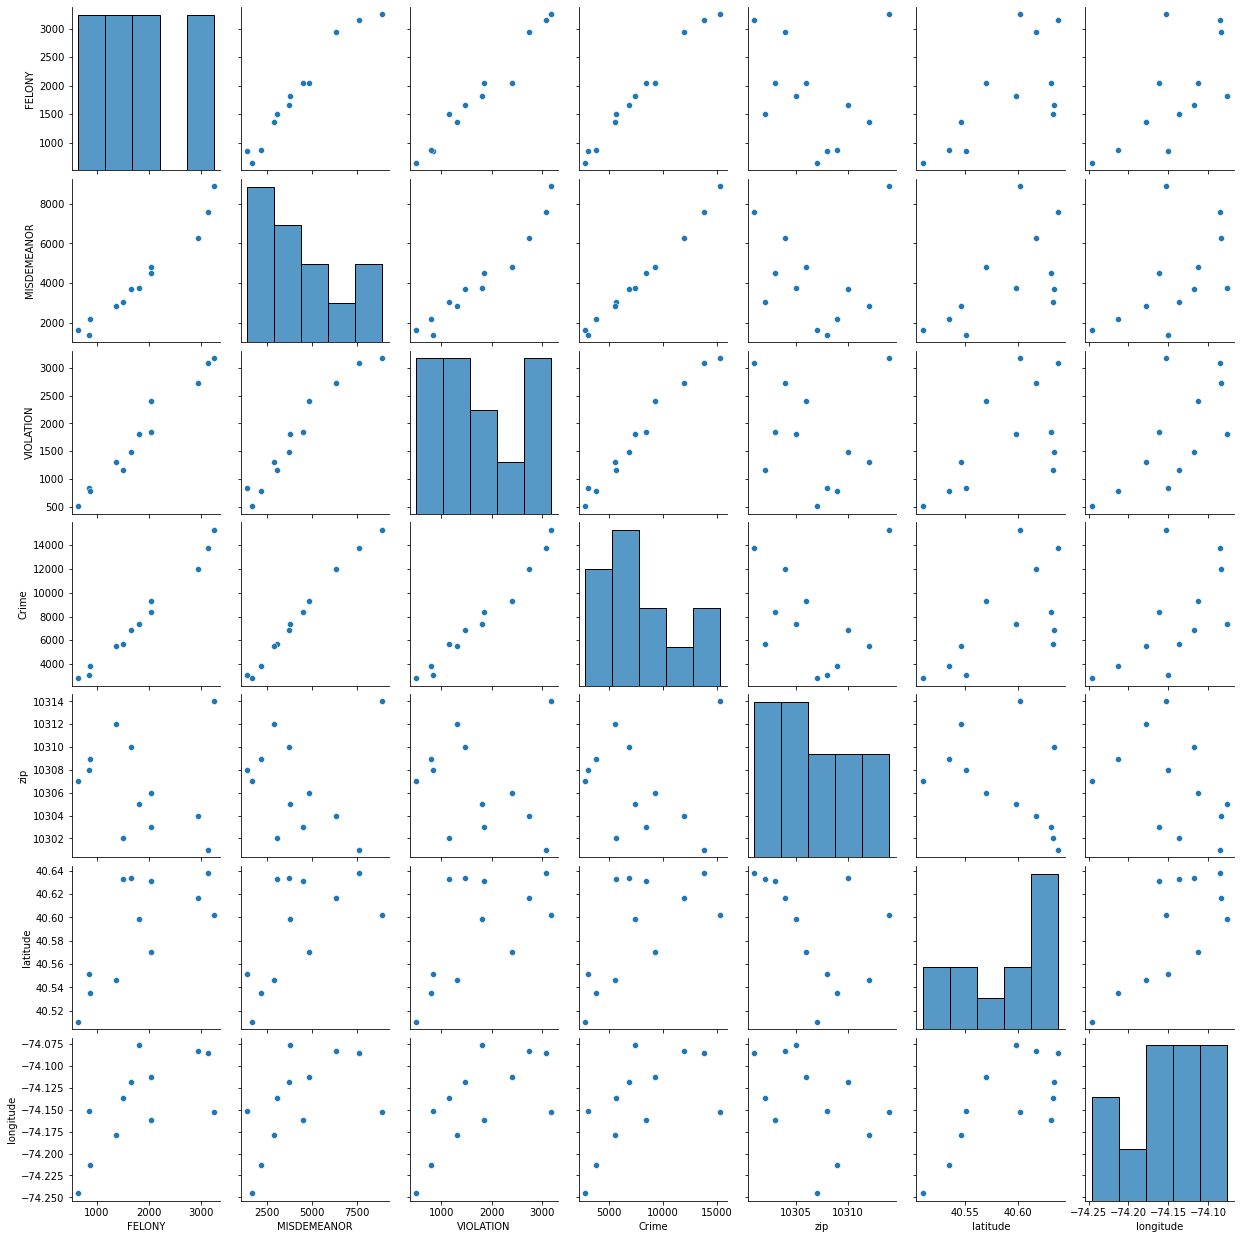

In [5]:
sns.pairplot(df)

## 1. K-Means

- Drop zip code column

In [6]:
df2 = df.copy()
df2.drop('zip', axis=1, inplace=True)
df2.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,3150,7580,3077,13807,40.637792,-74.085227
1,1501,3031,1158,5690,40.632790,-74.136948
2,2047,4509,1839,8395,40.631216,-74.161290
3,2946,6294,2729,11969,40.616653,-74.083375
4,1813,3762,1799,7374,40.598404,-74.075968


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(df2)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled) for k in range(2, 7)]
inertias = [model.inertia_ for model in kmeans_per_k]

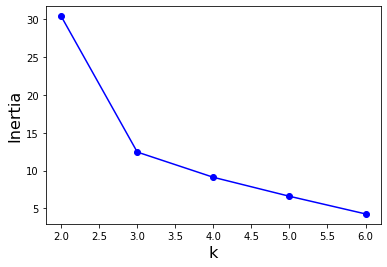

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), inertias, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.show()

In [9]:
# Computation of silhouette sores
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in kmeans_per_k]

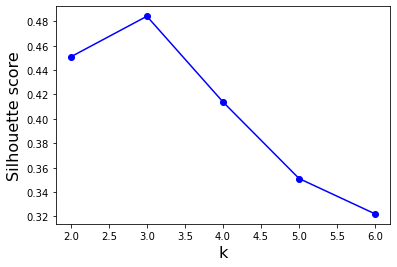

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.show()

## 3-Cluster result

In [11]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [12]:
# Scatter plot of 3-cluster result
# X_scaled: scaled X variables
# yr: cluster labels
# column name of X variables
# x: x-label to plot
# y: y-label to plot
def plot_3c(X_s, yr, cols, x, y):
    nx = cols.index(x)
    ny = cols.index(y)
    plt.scatter(X_s[:,nx][yr==2], X_s[:,ny][yr==2],
              marker='^', c = 'g', s = 80, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==1], X_s[:,ny][yr==1],
              marker='o', c = 'm', s = 70, alpha = 0.6)
    plt.scatter(X_s[:,nx][yr==0], X_s[:,ny][yr==0],
              marker='D', c = 'r', s = 50, alpha = 0.6)
    plt.xlabel(x,fontsize=14)
    plt.ylabel(y,fontsize=14)
    plt.legend(["C2","C1","C0"],fontsize=14)

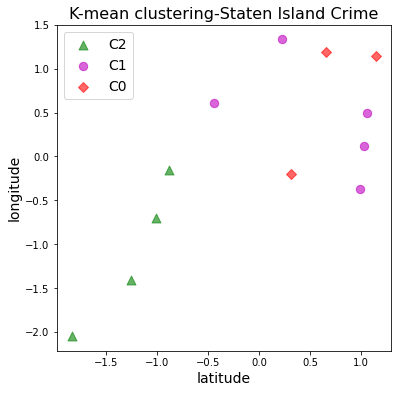

In [13]:
cols = list(df2)
plt.figure(figsize=(6,6))
plot_3c(X_scaled, kmeans_3.labels_, cols, 'latitude', 'longitude')
plt.title('K-mean clustering-Staten Island Crime', fontsize = 16)
plt.show()

### 3 Cluster center

In [14]:
cols = list(df2)
kmeans_center_df = pd.DataFrame(kmeans_3.cluster_centers_, columns=cols)
kmeans_center_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
0,1.487548,1.500857,1.419503,1.490808,0.704695,0.712274
1,-0.036258,-0.115158,-0.027109,-0.079407,0.573854,0.436832
2,-1.070339,-0.981696,-1.030741,-1.018847,-1.245838,-1.080245


In [15]:
table1 = df2.describe()
table1[:3]

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude
count,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,1845.916667,4224.500000,1756.833333,7827.25000,40.588834,-74.142859
std,890.605153,2340.934798,910.548469,4112.36968,0.044526,0.052390


### Scaled cluster center

In [16]:
# Scaled cluster center
kmeans_center_scale_df = kmeans_center_df.copy()
for i in cols:
    kmeans_center_scale_df[i] = kmeans_center_scale_df[i]*table1[i][2]+table1[i][1]
    
kmeans_center_scale_df = kmeans_center_scale_df.astype({"FELONY":int, "MISDEMEANOR": int, "VIOLATION":int, "Crime": int})
kmeans_center_scale_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_scale_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,3170,7737,3049,13958,40.620212,-74.105543,0
1,1813,3954,1732,7500,40.614386,-74.119973,1
2,892,1926,818,3637,40.533362,-74.199453,2


### Scaled cluster center/mean value

In [17]:
# Scaled cluster center (normalized by mean)
table1 = df2.describe()
cols = list(df2)
kmeans_center_ratio_df = kmeans_center_scale_df.copy()
for i in cols:
    kmeans_center_ratio_df[i] = (kmeans_center_df[i]*table1[i][2]+table1[i][1])/table1[i][1]

kmeans_center_ratio_df["cluster"] = kmeans_center_scale_df.index
kmeans_center_ratio_df

,FELONY,MISDEMEANOR,VIOLATION,Crime,latitude,longitude,cluster
0,1.717702,1.831675,1.735714,1.783258,1.000773,0.999497,0
1,0.982507,0.936187,0.985950,0.958280,1.000630,0.999691,1
2,0.483590,0.456010,0.465778,0.464707,0.998633,1.000763,2


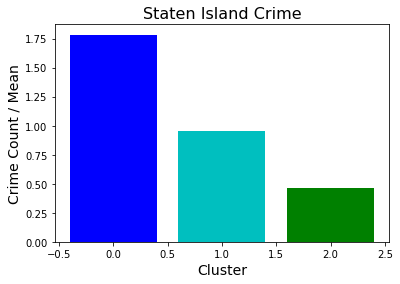

In [18]:
plt.figure(figsize=(6,4))
plt.bar(kmeans_center_ratio_df['cluster'],kmeans_center_ratio_df['Crime'],color=['b','c', 'g','r','y'])
plt.xlabel("Cluster",fontsize=14)
plt.ylabel("Crime Count / Mean",fontsize=14)
#plt.grid()
plt.title('Staten Island Crime', fontsize = 16)
plt.show()

## Append 3-cluster result to the dataframe

In [19]:
label = kmeans_3.labels_
df["K_mean"] = label
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,3150,7580,3077,13807,10301,40.637792,-74.085227,0
1,1501,3031,1158,5690,10302,40.632790,-74.136948,1
2,2047,4509,1839,8395,10303,40.631216,-74.161290,1
3,2946,6294,2729,11969,10304,40.616653,-74.083375,0
4,1813,3762,1799,7374,10305,40.598404,-74.075968,1


In [20]:
# Write to a csv file
df.to_csv("df_island_k3.csv", index = False)

## Append 3 cluster result to df_bronx.csv

In [21]:
# Make zip to cluster conversion dictionary
queens_zip_cluster3 = []
for i in range(len(df)):
    queens_zip_cluster3.append([df['zip'].iloc[i], df['K_mean'].iloc[i]])
queens_zip_cluster3_dict = dict(queens_zip_cluster3)

In [22]:
df_b = pd.read_csv("df_island.csv")

In [23]:
df_b['cluster'] = df_b['Zip'].apply(lambda x: queens_zip_cluster3_dict[x])

In [24]:
# Write to a csv file
df_b.to_csv("df_island_c3.csv", index = False)

### Cluster-Zip code

In [25]:
df_select = df[['zip','K_mean']]
cluster_zip_list = [] 
for cluster in range(3):
    cluster_zip_list.append(
        (cluster, list(df_select[df['K_mean']==cluster]['zip'])))
cluster_zip_dict =  dict(cluster_zip_list)

In [26]:
for cluster in range(3):
    print(cluster, cluster_zip_dict[cluster])

0 [10301, 10304, 10314]
1 [10302, 10303, 10305, 10306, 10310]
2 [10307, 10308, 10309, 10312]


In [27]:
pd.DataFrame(cluster_zip_dict.items(),
            columns=['Cluster','Zip Code'])

,Cluster,Zip Code
0,0,"[10301, 10304, 10314]"
1,1,"[10302, 10303, 10305, 10306, 10310]"
2,2,"[10307, 10308, 10309, 10312]"
